 In this my personal project, we will do classification using Credit Approval Data Set that contains from <a href="https://archive.ics.uci.edu/ml/datasets/credit+approval">Kaggle</a>. Data use attribute information as follows:
<ul>
    <li>A1:	b, a.</li>
    <li>A2:	continuous.</li>
    <li>A3:	continuous.</li>
    <li>A4:	u, y, l, t.</li>
    <li>A5:	g, p, gg.</li>
    <li>A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.</li>
    <li>A7:	v, h, bb, j, n, z, dd, ff, o.</li>
    <li>A8:	continuous.</li>
    <li>A9:	t, f.</li>
    <li>A10:	t, f.</li>
    <li>A11:	continuous.</li>
    <li>A12:	t, f.</li>
    <li>A13:	g, p, s.</li>
    <li>A14:	continuous.</li>
    <li>A15:	continuous.</li>
    <li>A16: +,- (class attribute)</li>
<ul>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('crx.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
df.shape

(690, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
for i in df.columns:
    a=df[df[i]=='?'].shape[0]
    if a>0:
        print(i,'\t:', a)
    else:
        print(i,'\t: No Missing Value')

0 	: 12
1 	: 12
2 	: No Missing Value
3 	: 6
4 	: 6
5 	: 9
6 	: 9
7 	: No Missing Value
8 	: No Missing Value
9 	: No Missing Value
10 	: No Missing Value
11 	: No Missing Value
12 	: No Missing Value
13 	: 13
14 	: No Missing Value
15 	: No Missing Value


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
df.replace('?', np.NaN, inplace=True)

df[0].replace(np.NaN, 'b', inplace=True)
df[0] = df[0].astype('category')

df[1].replace(np.NaN, df[1].notnull().mean(), inplace=True)
df[1] = df[1].astype('float')

df[3].replace(np.NaN, 'u', inplace=True)
df[3] = df[3].astype('category')

df[4].replace(np.NaN, 'g', inplace=True)
df[4] = df[4].astype('category')

df[5].replace(np.NaN, 'c', inplace=True)
df[5] = df[5].astype('category')

df[6].replace(np.NaN, 'v', inplace=True)
df[6] = df[6].astype('category')

df[13].replace(np.NaN, df[13].notnull().mean(), inplace=True)
df[13] = df[13].astype('float')

df[15] = df[15].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null category
1     690 non-null float64
2     690 non-null float64
3     690 non-null category
4     690 non-null category
5     690 non-null category
6     690 non-null category
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null float64
14    690 non-null int64
15    690 non-null category
dtypes: category(6), float64(4), int64(2), object(4)
memory usage: 59.6+ KB


## Analyzing Individual Feature Patterns using Visualization

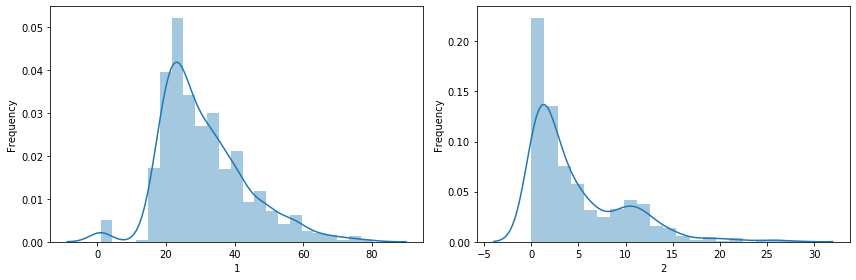

In [8]:
f, axes = plt.subplots(1,2,figsize=[12,4])
sns.distplot(df[1], ax=axes[0]).set(xlabel='1', ylabel='Frequency')
sns.distplot(df[2], ax=axes[1]).set(xlabel='2', ylabel='Frequency')
plt.tight_layout()

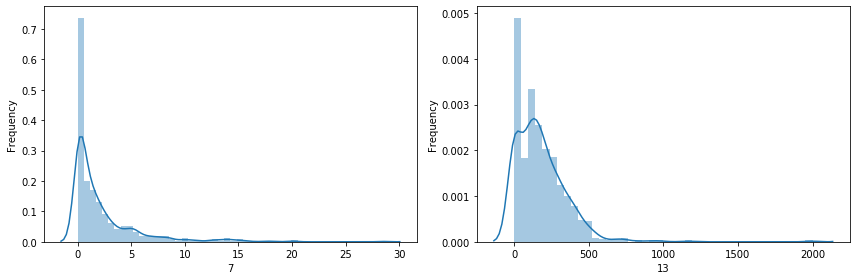

In [9]:
f, axes = plt.subplots(1,2,figsize=[12,4])
sns.distplot(df[7], ax=axes[0]).set(xlabel='7', ylabel='Frequency')
sns.distplot(df[13], ax=axes[1]).set(xlabel='13', ylabel='Frequency')
plt.tight_layout()

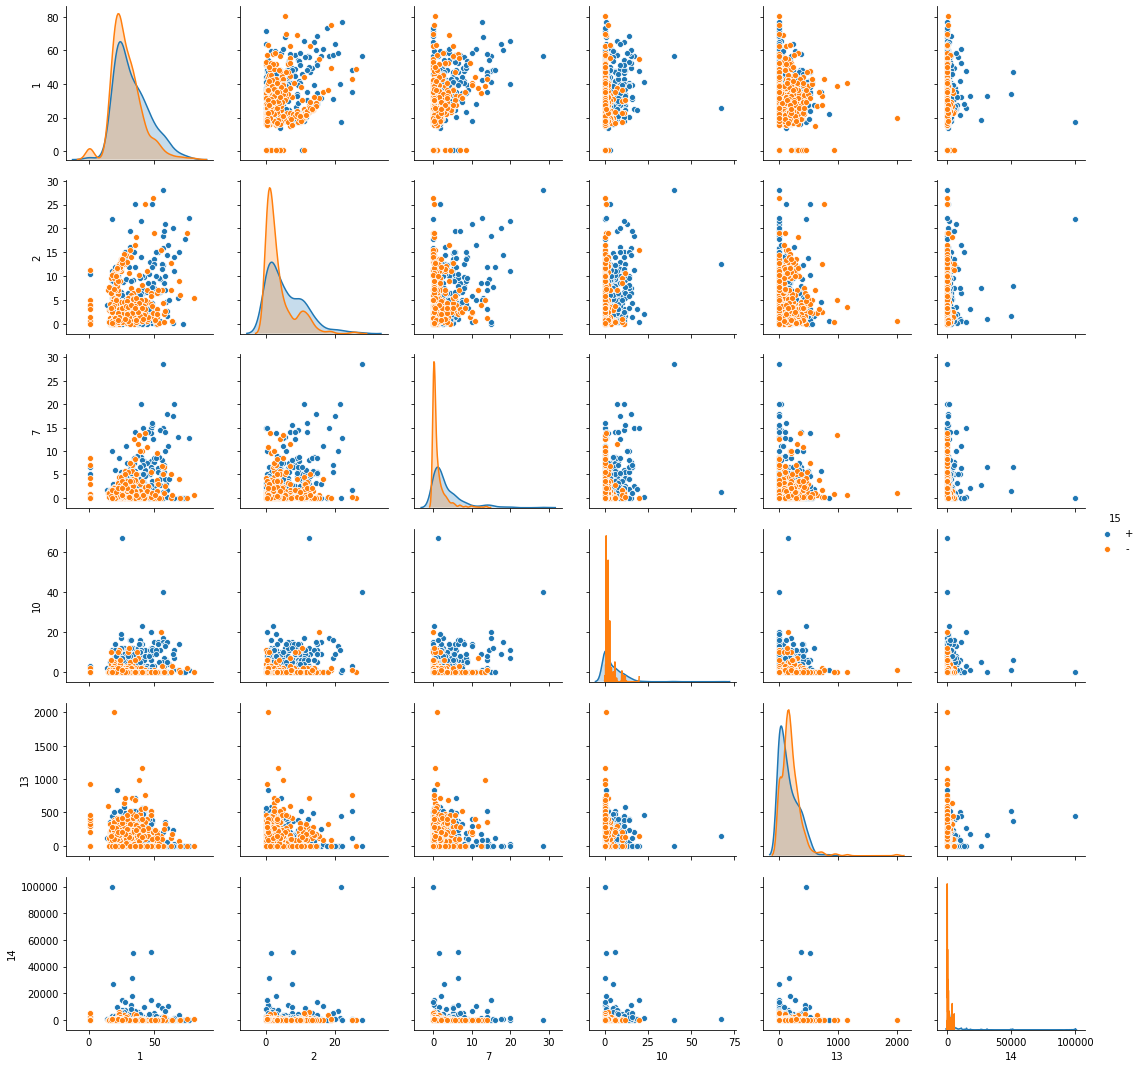

In [10]:
sns.pairplot(df, hue=15)

### Positive Linear Relationship

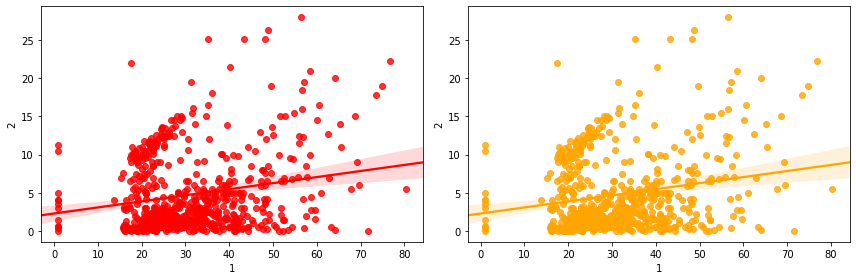

In [11]:
f, axes = plt.subplots(1,2,figsize=[12,4])
sns.regplot(x=df[1], y=df[2], ax=axes[0], color='red')
sns.regplot(x=df[1], y=df[2], ax=axes[1], color='orange')
plt.tight_layout()

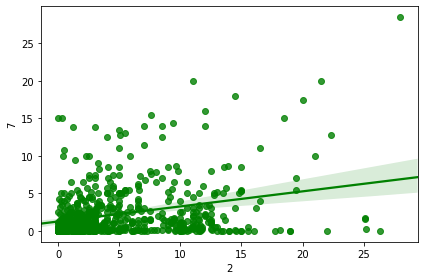

In [12]:
sns.regplot(x=df[2], y=df[7], color='green')
plt.tight_layout()

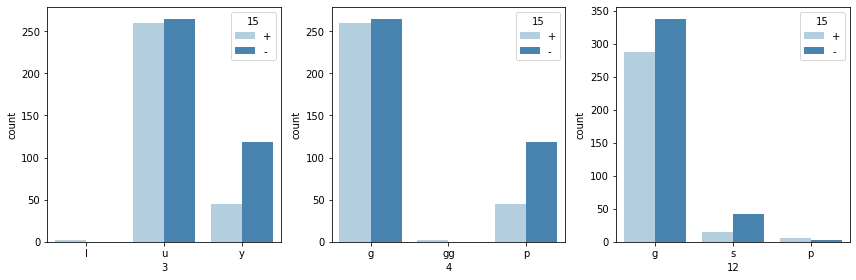

In [13]:
f, axes = plt.subplots(1,3,figsize=[12,4])
sns.countplot(df[3], hue=df[15], ax=axes[0], palette='Blues')
sns.countplot(df[4], hue=df[15], ax=axes[1], palette='Blues')
sns.countplot(df[12], hue=df[15], ax=axes[2], palette='Blues')
plt.tight_layout()

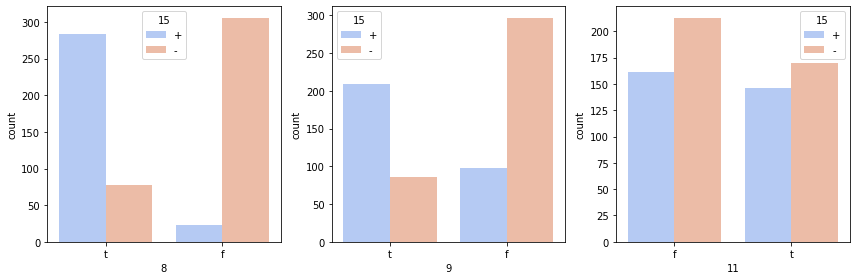

In [14]:
f, axes = plt.subplots(1,3,figsize=[12,4])
sns.countplot(df[8], hue=df[15], ax=axes[0], palette='coolwarm')
sns.countplot(df[9], hue=df[15], ax=axes[1], palette='coolwarm')
sns.countplot(df[11], hue=df[15], ax=axes[2], palette='coolwarm')
plt.tight_layout()

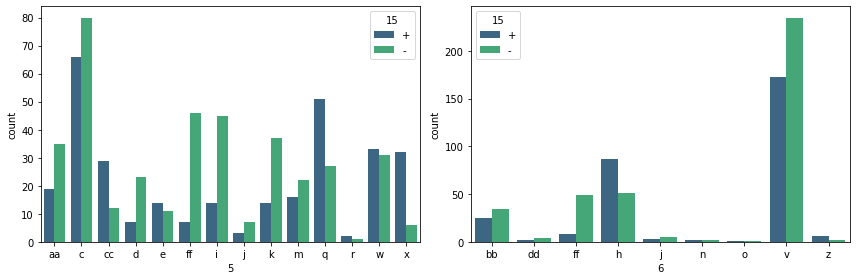

In [15]:
f, axes = plt.subplots(1,2,figsize=[12,4])
sns.countplot(df[5], hue=df[15], ax=axes[0], palette='viridis')
sns.countplot(df[6], hue=df[15], ax=axes[1], palette='viridis')
plt.tight_layout()

### Categorical

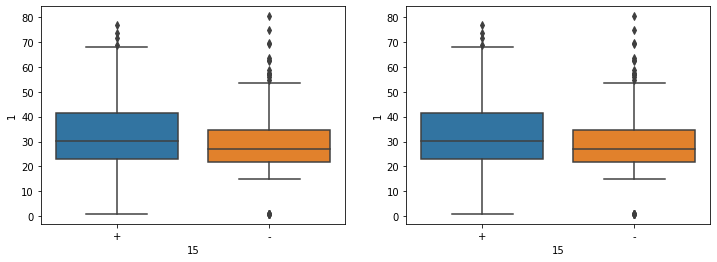

In [16]:
f, axes = plt.subplots(1,2,figsize=[12,4])
sns.boxplot(df[15], df[1], ax=axes[0])
sns.boxplot(df[15], df[1], ax=axes[1])

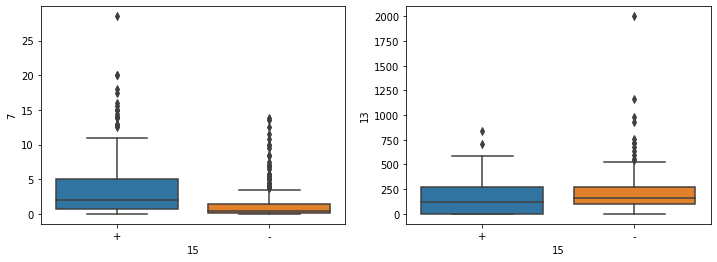

In [17]:
f, axes = plt.subplots(1,2,figsize=[12,4])
sns.boxplot(df[15], df[7], ax=axes[0])
sns.boxplot(df[15], df[13], ax=axes[1])

## Descriptive Statistical Analysis

In [18]:
pd.set_option('precision', 3)
df.describe()

,1,2,7,10,13,14
count,690.000,690.000,690.000,690.000,690.000,690.000
mean,31.036,4.759,2.223,2.400,180.566,1017.386
std,12.510,4.978,3.347,4.863,173.951,5210.103
min,0.983,0.000,0.000,0.000,0.000,0.000
25%,22.440,1.000,0.165,0.000,60.000,0.000
50%,28.170,2.750,1.000,0.000,160.000,5.000
75%,37.707,7.207,2.625,3.000,272.000,395.500
max,80.250,28.000,28.500,67.000,2000.000,100000.000


In [19]:
df[3].value_counts()

u    525
y    163
l      2
Name: 3, dtype: int64

In [20]:
df[4].value_counts()

g     525
p     163
gg      2
Name: 4, dtype: int64

In [21]:
df[8].value_counts()

t    361
f    329
Name: 8, dtype: int64

In [22]:
df[9].value_counts()

f    395
t    295
Name: 9, dtype: int64

In [23]:
df[11].value_counts()

f    374
t    316
Name: 11, dtype: int64

In [24]:
df[12].value_counts()

g    625
s     57
p      8
Name: 12, dtype: int64

In [25]:
df[15].value_counts()

-    383
+    307
Name: 15, dtype: int64

In [26]:
# plus categorical
df_plus = df[df[15]=='+']
df_plus.describe()

,1,2,7,10,13,14
count,307.000,307.000,307.000,307.000,307.000,307.000
mean,33.507,5.905,3.428,4.606,161.228,2038.860
std,13.037,5.471,4.121,6.320,161.772,7659.764
min,0.983,0.000,0.000,0.000,0.000,0.000
25%,23.170,1.500,0.750,0.000,0.000,0.000
50%,30.170,4.460,2.000,3.000,117.000,221.000
75%,41.330,9.520,5.000,7.000,277.000,1209.000
max,76.750,28.000,28.500,67.000,840.000,100000.000


In [27]:
# minus categorical
df_minus = df[df[15]=='-']
df_minus.describe()

,1,2,7,10,13,14
count,383.000,383.000,383.000,383.000,383.000,383.000
mean,29.056,3.840,1.258,0.632,196.068,198.606
std,11.717,4.338,2.120,1.900,181.857,671.609
min,0.983,0.000,0.000,0.000,0.000,0.000
25%,21.625,0.835,0.125,0.000,100.000,0.000
50%,26.830,2.210,0.415,0.000,160.000,1.000
75%,34.790,5.000,1.500,0.000,270.000,67.000
max,80.250,26.335,13.875,20.000,2000.000,5552.000


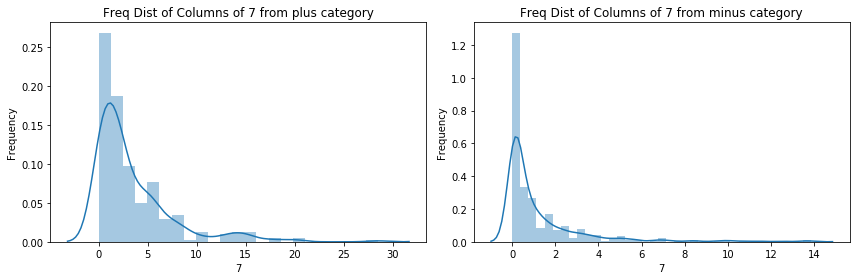

In [28]:
f, axes = plt.subplots(1,2,figsize=[12,4])
sns.distplot(df_plus[7], ax=axes[0]).set(xlabel='7', ylabel='Frequency', title='Freq Dist of Columns of 7 from plus category')
sns.distplot(df_minus[7], ax=axes[1]).set(xlabel='7', ylabel='Frequency', title='Freq Dist of Columns of 7 from minus category')
plt.tight_layout()

## Grouping

In [29]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+


In [30]:
hm = df.groupby(by=[df[15], df[11]]).count()[13].unstack()
hm

11,f,t
15,,
+,161,146
-,213,170


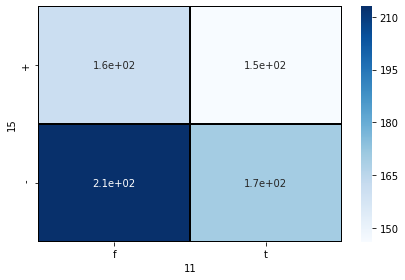

In [31]:
sns.heatmap(hm, cmap='Blues', lw=1, linecolor='black', annot=True)
plt.xlim(0,2)
plt.ylim(2,0)
plt.tight_layout()

In [32]:
hms = df.groupby(by=[df[15], df[5]]).count()[13].unstack()
hms

5,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
15,,,,,,,,,,,,,,
+,19,66,29,7,14,7,14,3,14,16,51,2,33,32
-,35,80,12,23,11,46,45,7,37,22,27,1,31,6


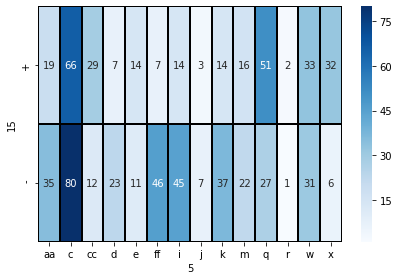

In [33]:
sns.heatmap(hms, cmap='Blues', lw=1, linecolor='black', annot=True)
plt.xlim(0,14)
plt.ylim(2,0)
plt.tight_layout()

## Correlation

In [34]:
df.corr(method='pearson')

,1,2,7,10,13,14
1,1.000,0.200,0.362,0.193,-0.095,0.019
2,0.200,1.000,0.299,0.271,-0.218,0.123
7,0.362,0.299,1.000,0.322,-0.071,0.051
10,0.193,0.271,0.322,1.000,-0.113,0.064
13,-0.095,-0.218,-0.071,-0.113,1.000,0.059
14,0.019,0.123,0.051,0.064,0.059,1.000


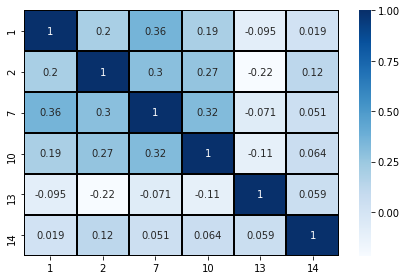

In [35]:
sns.heatmap(df.corr(method='pearson'), cmap='Blues', lw=1, linecolor='black', annot=True)
plt.xlim(0,6)
plt.ylim(6,0)
plt.tight_layout()

___

## Normalize Data and Feature Extraction

In [36]:
df[3] = preprocessing.LabelEncoder().fit(df[3]).transform(df[3])
df[4] = preprocessing.LabelEncoder().fit(df[4]).transform(df[4])
df[8] = preprocessing.LabelEncoder().fit(df[8]).transform(df[8])
df[9] = preprocessing.LabelEncoder().fit(df[9]).transform(df[9])
df[11] = preprocessing.LabelEncoder().fit(df[11]).transform(df[11])
df[12] = preprocessing.LabelEncoder().fit(df[12]).transform(df[12])
df[15] = preprocessing.LabelEncoder().fit(df[15]).transform(df[15])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,1,0,w,v,1.25,1,1,1,0,0,202.0,0,0
1,a,58.67,4.460,1,0,q,h,3.04,1,1,6,0,0,43.0,560,0
2,a,24.50,0.500,1,0,q,h,1.50,1,0,0,0,0,280.0,824,0
3,b,27.83,1.540,1,0,w,v,3.75,1,1,5,1,0,100.0,3,0
4,b,20.17,5.625,1,0,w,v,1.71,1,0,0,0,2,120.0,0,0


In [37]:
scale = df.copy()
scale.drop(columns = [0, 5, 6, 15], axis=1, inplace=True)
scale.head()

,1,2,3,4,7,8,9,10,11,12,13,14
0,30.83,0.000,1,0,1.25,1,1,1,0,0,202.0,0
1,58.67,4.460,1,0,3.04,1,1,6,0,0,43.0,560
2,24.50,0.500,1,0,1.50,1,0,0,0,0,280.0,824
3,27.83,1.540,1,0,3.75,1,1,5,1,0,100.0,3
4,20.17,5.625,1,0,1.71,1,0,0,0,2,120.0,0


In [38]:
scale_feat = preprocessing.StandardScaler().fit(scale).transform(scale)

In [39]:
df_scale = pd.DataFrame(scale_feat, columns = scale.columns)
df_scale.head()

,1,2,3,4,7,8,9,10,11,12,13,14
0,-0.016,-0.957,-0.543,-0.559,-0.291,0.955,1.157,-0.288,-0.919,-0.317,0.123,-0.195
1,2.210,-0.060,-0.543,-0.559,0.244,0.955,1.157,0.741,-0.919,-0.317,-0.791,-0.088
2,-0.523,-0.856,-0.543,-0.559,-0.216,0.955,-0.864,-0.494,-0.919,-0.317,0.572,-0.037
3,-0.256,-0.647,-0.543,-0.559,0.457,0.955,1.157,0.535,1.088,-0.317,-0.463,-0.195
4,-0.869,0.174,-0.543,-0.559,-0.154,0.955,-0.864,-0.494,-0.919,3.271,-0.348,-0.195


## p-value

In [40]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df[1], df[15])
print("The Pearson Correlation Coefficient (1 vs 15) is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df[2], df[15])
print("The Pearson Correlation Coefficient (2 vs 15) is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df[7], df[15])
print("The Pearson Correlation Coefficient (7 vs 15) is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df[10], df[15])
print("The Pearson Correlation Coefficient (10 vs 15) is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df[13], df[15])
print("The Pearson Correlation Coefficient (13 vs 15) is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df[14], df[15])
print("The Pearson Correlation Coefficient (14 vs 15) is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient (1 vs 15) is -0.17696256767242186  with a P-value of P = 2.9116109644884205e-06
The Pearson Correlation Coefficient (2 vs 15) is -0.20629373864503903  with a P-value of P = 4.5516807023076266e-08
The Pearson Correlation Coefficient (7 vs 15) is -0.32247535825538465  with a P-value of P = 3.6710537401596546e-18
The Pearson Correlation Coefficient (10 vs 15) is -0.4064100087639554  with a P-value of P = 7.957718568079231e-29
The Pearson Correlation Coefficient (13 vs 15) is 0.0996056413917101  with a P-value of P = 0.00883960302837264
The Pearson Correlation Coefficient (14 vs 15) is -0.1756572009935051  with a P-value of P = 3.452025695628437e-06


## Train Test Split

In [41]:
X = df_scale
y = df[15]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (483, 12) (483,)
Test set:  (207, 12) (207,)


## Building K Nearest Neighbors Model

In [43]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [44]:
pred_knn = knn.predict(X_test)
pred_knn[0:5]

array([1, 0, 1, 0, 1])

### Evaluation

In [45]:
print('Classification Report: \n', classification_report(y_test, pred_knn))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_knn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        94
           1       0.83      0.81      0.82       113

    accuracy                           0.80       207
   macro avg       0.80      0.80      0.80       207
weighted avg       0.80      0.80      0.80       207



Confusion Matrix: 
 [[75 19]
 [22 91]]


In [46]:
print('Train Accuracy: ', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_knn))

Train Accuracy:  1.0
Test Accuracy:  0.8019323671497585


## Choosing a K value

In [47]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

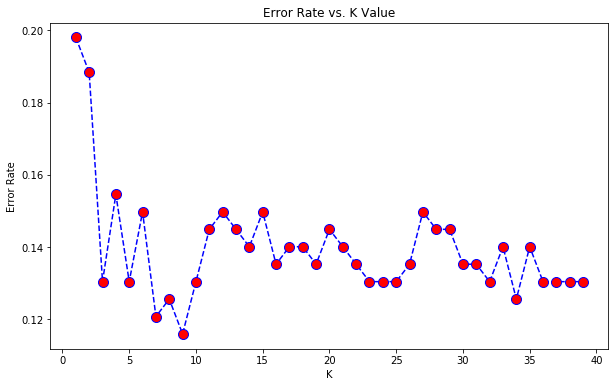

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Evaluation Again

In [49]:
# COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

print('WITH K=1')
print('\n')
print('Classificaton Report: \n', classification_report(y_test,pred_knn))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test,pred_knn))

WITH K=1


Classificaton Report: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        94
           1       0.83      0.81      0.82       113

    accuracy                           0.80       207
   macro avg       0.80      0.80      0.80       207
weighted avg       0.80      0.80      0.80       207



Confusion Matrix: 
 [[75 19]
 [22 91]]


In [50]:
print('Train Accuracy: ', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_knn))

Train Accuracy:  1.0
Test Accuracy:  0.8019323671497585


In [51]:
# NOW WITH K=9
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

print('WITH K=9')
print('\n')
print('Classificaton Report: \n', classification_report(y_test,pred_knn))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test,pred_knn))

WITH K=9


Classificaton Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        94
           1       0.89      0.89      0.89       113

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



Confusion Matrix: 
 [[ 82  12]
 [ 12 101]]


In [52]:
print('Train Accuracy: ', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_knn))

Train Accuracy:  0.8571428571428571
Test Accuracy:  0.8840579710144928


In [53]:
Ks = 41
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.80193237, 0.8115942 , 0.86956522, 0.84541063, 0.86956522,
       0.85024155, 0.87922705, 0.87439614, 0.88405797, 0.86956522,
       0.85507246, 0.85024155, 0.85507246, 0.85990338, 0.85024155,
       0.8647343 , 0.85990338, 0.85990338, 0.8647343 , 0.85507246,
       0.85990338, 0.8647343 , 0.86956522, 0.86956522, 0.86956522,
       0.8647343 , 0.85024155, 0.85507246, 0.85507246, 0.8647343 ,
       0.8647343 , 0.86956522, 0.85990338, 0.87439614, 0.85990338,
       0.86956522, 0.86956522, 0.86956522, 0.86956522, 0.86956522])

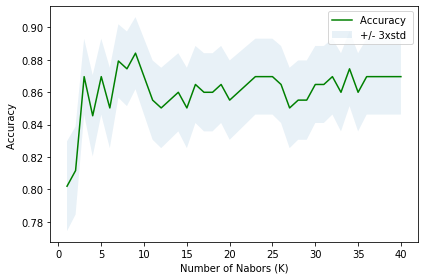

In [54]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

___

## Building Decision Tree Model

In [55]:
dtree = DecisionTreeClassifier().fit(X_train, y_train)
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
pred_dtree = dtree.predict(X_test)
pred_dtree[0:5]

array([1, 1, 1, 0, 1])

### Evaluation

In [57]:
print('Classification Report: \n', classification_report(y_test, pred_dtree))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_dtree))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        94
           1       0.83      0.81      0.82       113

    accuracy                           0.81       207
   macro avg       0.81      0.81      0.81       207
weighted avg       0.81      0.81      0.81       207



Confusion Matrix: 
 [[75 19]
 [21 92]]


In [58]:
print('Train Accuracy: ', metrics.accuracy_score(y_train, dtree.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_dtree))

Train Accuracy:  1.0
Test Accuracy:  0.8067632850241546


___

## Building Logistic Regression Model

In [59]:
log = LogisticRegression().fit(X_train, y_train)
log

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
pred_log = log.predict(X_test)
pred_log[0:5]

array([1, 0, 1, 0, 1])

### Evaluation

In [61]:
print('Classification Report: \n', classification_report(y_test, pred_log))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_log))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        94
           1       0.93      0.87      0.90       113

    accuracy                           0.89       207
   macro avg       0.89      0.90      0.89       207
weighted avg       0.90      0.89      0.89       207



Confusion Matrix: 
 [[87  7]
 [15 98]]


In [62]:
print('Train Accuracy: ', metrics.accuracy_score(y_train, log.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_log))

Train Accuracy:  0.8571428571428571
Test Accuracy:  0.893719806763285


___

## Building Support Vector Machine Model

In [63]:
svm = SVC().fit(X_train, y_train)
svm

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [64]:
pred_svm = svm.predict(X_test)
pred_svm[0:5]

array([1, 0, 1, 0, 1])

### Evaluation

In [65]:
print('Classification Report: \n', classification_report(y_test, pred_svm))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_svm))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87        94
           1       0.91      0.85      0.88       113

    accuracy                           0.87       207
   macro avg       0.87      0.88      0.87       207
weighted avg       0.88      0.87      0.87       207



Confusion Matrix: 
 [[85  9]
 [17 96]]


In [66]:
print('Train Accuracy: ', metrics.accuracy_score(y_train, svm.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_svm))

Train Accuracy:  0.8799171842650103
Test Accuracy:  0.8743961352657005


## Gridsearch

In [67]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [70]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.559, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.559, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.559, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.863, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.863, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.839, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.801, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.839, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.559, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.559, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.559, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.559, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.559, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.839, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.857, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.863, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.826, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [71]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [72]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
grid_predictions = grid.predict(X_test)

In [74]:
print('Classification Report: \n', classification_report(y_test, grid_predictions))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, grid_predictions))
print('\n')
print('Train Accuracy: ', metrics.accuracy_score(y_train, grid.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, grid_predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        94
           1       0.91      0.84      0.88       113

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207



Confusion Matrix: 
 [[85  9]
 [18 95]]


Train Accuracy:  0.8778467908902692
Test Accuracy:  0.8695652173913043


___

## Building Random Forest Model

In [75]:
rfc = RandomForestClassifier().fit(X_train, y_train)
rfc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
pred_rfc = rfc.predict(X_test)
pred_rfc[0:5]

array([1, 0, 1, 0, 1])

### Evaluation

In [77]:
print('Classification Report: \n', classification_report(y_test, pred_rfc))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_rfc))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        94
           1       0.89      0.85      0.87       113

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



Confusion Matrix: 
 [[82 12]
 [17 96]]


In [78]:
print('Train Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_rfc))

Train Accuracy:  0.9875776397515528
Test Accuracy:  0.8599033816425121
